<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATOS GENERALES##

Gerardo Quiroga Najera, A0096799
Ciencia y Analítica de Datos
Profa: Maria de la Paz Rico
Nov 1, 2022



Limpia los datos eliminando los registros nulos o rellena con la media de la columna
Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
Realiza el conteo de las variables categóricas
Escala los datos, si consideras necesario
Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente
Elabora los histogramas de los atributos para visualizar su distribución
Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
##1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. 
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [20]:
df.rename(columns={ "X1":"Credito",
                    "X2":"Genero",
                    "X3":"Grado Educativo",
                    "X4":"Status",
                    "X5":"Edad",
                    "X6":"HistoricoPago_04",
                    "X7":"HistoricoPago_05", #repayment
                    "X8":"HistoricoPago_06",
                    "X9":"HistoricoPago_07",
                    "X10":"HistoricoPago_08",
                    "X11":"HistoricoPago_09",
                    "X12":"Balance_04",
                    "X13":"Balance_05",
                    "X14":"Balance_06", #bill
                    "X15":"Balance_07",
                    "X16":"Balance_08",
                    "X17":"Balance_09",
                    "X18":"Pago_09",
                    "X19":"Pago_08",
                    "X20":"Pago_07", #paid
                    "X21":"Pago_06",
                    "X22":"Pago_05",
                    "X23":"Pago_04"
                   },inplace=True)

In [21]:
## 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
print('shape: ',df.shape)
print('columnas: ',df.columns)
print('dtypes: ',df.dtypes)

shape:  (30000, 25)
columnas:  Index(['ID', 'Credito', 'Genero', 'Grado Educativo', 'Status', 'Edad',
       'HistoricoPago_04', 'HistoricoPago_05', 'HistoricoPago_06',
       'HistoricoPago_07', 'HistoricoPago_08', 'HistoricoPago_09',
       'Balance_04', 'Balance_05', 'Balance_06', 'Balance_07', 'Balance_08',
       'Balance_09', 'Pago_09', 'Pago_08', 'Pago_07', 'Pago_06', 'Pago_05',
       'Pago_04', 'Y'],
      dtype='object')
dtypes:  ID                    int64
Credito               int64
Genero              float64
Grado Educativo     float64
Status              float64
Edad                float64
HistoricoPago_04    float64
HistoricoPago_05    float64
HistoricoPago_06    float64
HistoricoPago_07    float64
HistoricoPago_08    float64
HistoricoPago_09    float64
Balance_04          float64
Balance_05          float64
Balance_06          float64
Balance_07          float64
Balance_08          float64
Balance_09          float64
Pago_09             float64
Pago_08             floa

In [22]:
print('info:',df.info())
print('nulos: ',df.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  int64  
 1   Credito           30000 non-null  int64  
 2   Genero            29999 non-null  float64
 3   Grado Educativo   29998 non-null  float64
 4   Status            29998 non-null  float64
 5   Edad              29995 non-null  float64
 6   HistoricoPago_04  29997 non-null  float64
 7   HistoricoPago_05  29995 non-null  float64
 8   HistoricoPago_06  29993 non-null  float64
 9   HistoricoPago_07  29991 non-null  float64
 10  HistoricoPago_08  29984 non-null  float64
 11  HistoricoPago_09  29986 non-null  float64
 12  Balance_04        29989 non-null  float64
 13  Balance_05        29989 non-null  float64
 14  Balance_06        29987 non-null  float64
 15  Balance_07        29985 non-null  float64
 16  Balance_08        29983 non-null  float6

In [23]:
df.head()

,ID,Credito,Genero,Grado Educativo,Status,Edad,HistoricoPago_04,HistoricoPago_05,HistoricoPago_06,HistoricoPago_07,...,Balance_07,Balance_08,Balance_09,Pago_09,Pago_08,Pago_07,Pago_06,Pago_05,Pago_04,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [34]:
# 3 .Limpia los datos eliminando los registros nulos o rellena con la media de la columna
dfCopia = df.dropna()
dfCopia.shape

(29958, 25)

In [35]:
# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
dfCopia.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29958.0,15005.550504,8654.547473,1.0,7516.25,15005.5,22497.75,30000.0
Credito,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Grado Educativo,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
HistoricoPago_04,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
HistoricoPago_05,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
HistoricoPago_06,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
HistoricoPago_07,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0


#4 explica las medidas de tendencia central y dispersión:

la media en las variables de crédito es muy distintita a las relacionadas de balance, pago e histórico; ahora, en estas últimas, vemos que la diferencia de media entre ellas no es mucha, pero tienen comportamiento interesante entre balance y pago respectivamente. Con respecto a la desviación estandar vemos que es muy alta en la mayoría de las variables de pago, histórico y balance y su diferencia con la media es muy amplia.

In [56]:
#5. Realiza el conteo de las variables categóricas
cat = ['Genero','Grado Educativo','Status','HistoricoPago_04', 'HistoricoPago_05', 'HistoricoPago_06', 'HistoricoPago_07',
       'HistoricoPago_08', 'HistoricoPago_09']

print('Genero: ',dfCopia['Genero'].value_counts())
print('Grado Educativo: ',dfCopia['Grado Educativo'].value_counts())
print('Status: ',dfCopia['Status'].value_counts())
print('HistoricoPago_04: ',dfCopia['HistoricoPago_04'].value_counts())
print('HistoricoPago_05: ',dfCopia['HistoricoPago_05'].value_counts())
print('HistoricoPago_06: ',dfCopia['HistoricoPago_06'].value_counts())
print('HistoricoPago_07: ',dfCopia['HistoricoPago_07'].value_counts())
print('HistoricoPago_08: ',dfCopia['HistoricoPago_08'].value_counts())
print('HistoricoPago_09: ',dfCopia['HistoricoPago_09'].value_counts())


cont = ['Credito','Edad','Status','Balance_04','Balance_05', 'Balance_06', 'Balance_07', 'Balance_08',
       'Balance_09', 'Pago_09','Pago_08','Pago_07','Pago_06','Pago_05','Pago_04']

Genero:  2.0    18095
1.0    11863
Name: Genero, dtype: int64
Grado Educativo:  2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: Grado Educativo, dtype: int64
Status:  2.0    15939
1.0    13643
3.0      322
0.0       54
Name: Status, dtype: int64
HistoricoPago_04:   0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: HistoricoPago_04, dtype: int64
HistoricoPago_05:   0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: HistoricoPago_05, dtype: int64
HistoricoPago_06:   0.0    15742
-1.0     5930
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: HistoricoPago_06, dtype: int64
HistoricoPago_07:   0.0    16431
-1.0     5681
-2.0     4343
 2.0     3154


In [65]:
#6. Escala los datos, si consideras necesario
scaler = StandardScaler()
scaler.fit(dfCopia[cont])
X = scaler.transform(dfCopia[cont])

In [66]:
#7. Reduce las dimensiones con PCA
#7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
pcs = PCA()
pcs.fit(X)
pcsSummary_df = pd.DataFrame({'Desviacion Estandar': np.sqrt(pcs.explained_variance_),
                             'Proporcion de Varianza': pcs.explained_variance_ratio_,
                             'Proporcion cumulativa': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Desviacion Estandar,2.4333,1.3125,1.1955,0.9676,0.9402,0.9344,0.8839,0.8528,0.8468,0.7641,0.5142,0.2665,0.2026,0.1592,0.1525
Proporcion de Varianza,0.3947,0.1148,0.0953,0.0624,0.0589,0.0582,0.0521,0.0485,0.0478,0.0389,0.0176,0.0047,0.0027,0.0017,0.0015
Proporcion cumulativa,0.3947,0.5095,0.6048,0.6672,0.7262,0.7844,0.8364,0.8849,0.9327,0.9717,0.9893,0.9940,0.9968,0.9985,1.0000


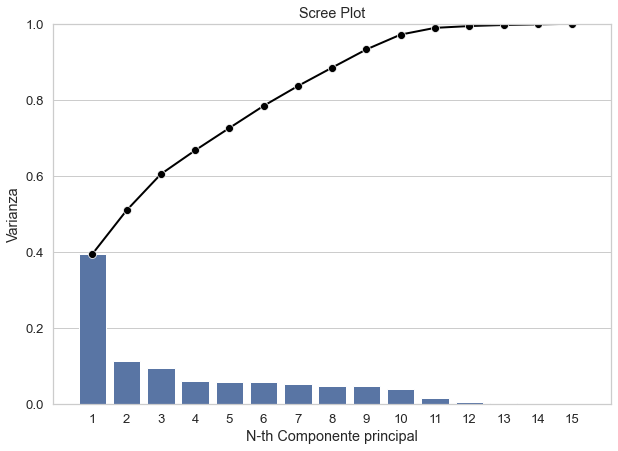

In [67]:
#7.2 Indica la importancia de las variables en cada componente
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Componente principal')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

In [68]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = dfCopia.loc[:, cont].columns
                                )
pcsComponents_df.iloc[:,:5]


,PC1,PC2,PC3,PC4,PC5
Credito,0.165852,0.314193,-0.141609,-0.329399,0.044369
Edad,0.034322,0.140625,-0.674752,0.061766,-0.004804
Status,-0.018326,-0.119635,0.679495,-0.085193,0.011990
Balance_04,0.372342,-0.189100,-0.030656,-0.072688,0.040823
Balance_05,0.383136,-0.174077,-0.017465,0.004490,0.083820
Balance_06,0.388156,-0.127505,-0.001075,0.069615,0.112634
Balance_07,0.391441,-0.121390,0.002149,0.079969,0.029982
Balance_08,0.388398,-0.107027,0.004454,0.049475,-0.104722
Balance_09,0.380554,-0.095772,0.008692,-0.054495,-0.169236
Pago_09,0.135083,0.373092,0.119581,0.389709,0.232573


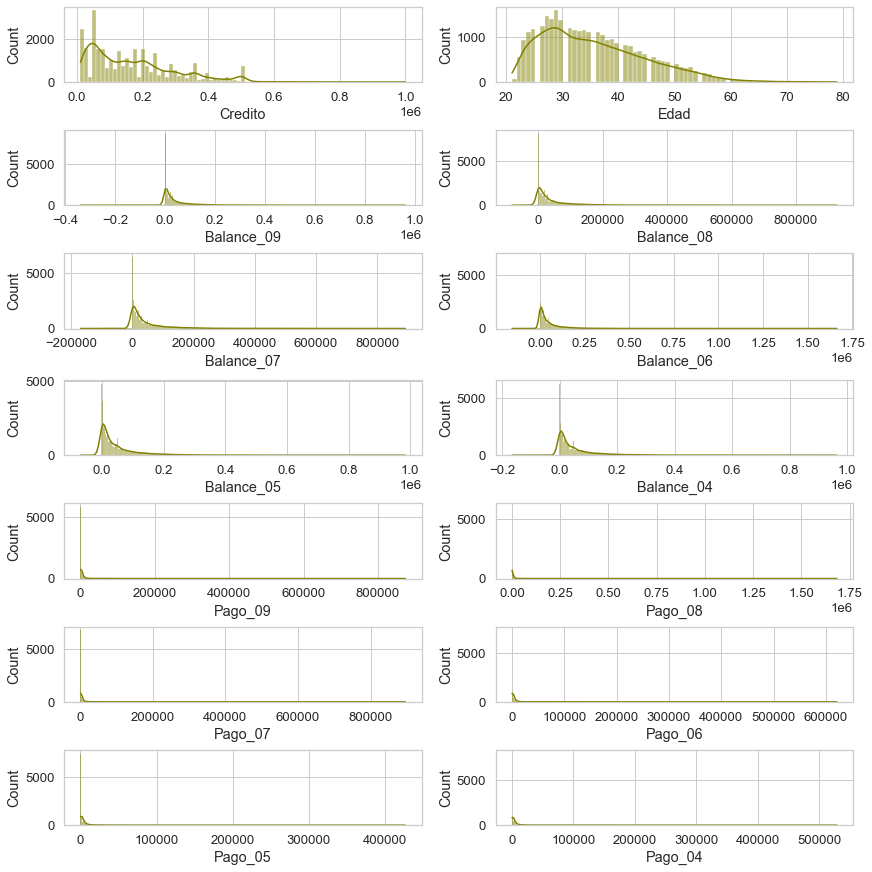

In [70]:
#8. Elabora los histogramas de los atributos para visualizar su distribución
fig, axs = plt.subplots(7, 2, figsize=(12, 12),constrained_layout=True)

sns.histplot(data=dfCopia, x="Credito", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=dfCopia, x="Edad", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfCopia, x="Balance_09", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=dfCopia, x="Balance_08", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=dfCopia, x="Balance_07", kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=dfCopia, x="Balance_06", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=dfCopia, x="Balance_05", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=dfCopia, x="Balance_04", kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=dfCopia, x="Pago_09", kde=True, color="olive", ax=axs[4, 0])
sns.histplot(data=dfCopia, x="Pago_08", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=dfCopia, x="Pago_07", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=dfCopia, x="Pago_06", kde=True, color="olive", ax=axs[5, 1])
sns.histplot(data=dfCopia, x="Pago_05", kde=True, color="olive", ax=axs[6, 0])
sns.histplot(data=dfCopia, x="Pago_04", kde=True, color="olive", ax=axs[6, 1])

plt.show()

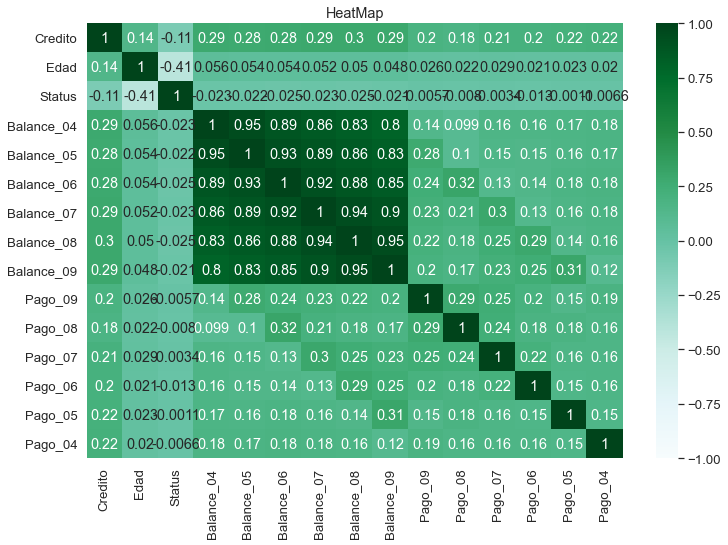

In [74]:
#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados

plt.figure(figsize=(12,8))
sns.heatmap( dfCopia[cont].corr(), annot=True, vmin=-1,vmax=1,cmap='BuGn')
plt.title("HeatMap")
plt.show()

Este tipo de Gráfico es muy visual y nos ayuda a revisar las variables de nuestro PCA así como ver datos atípicos.

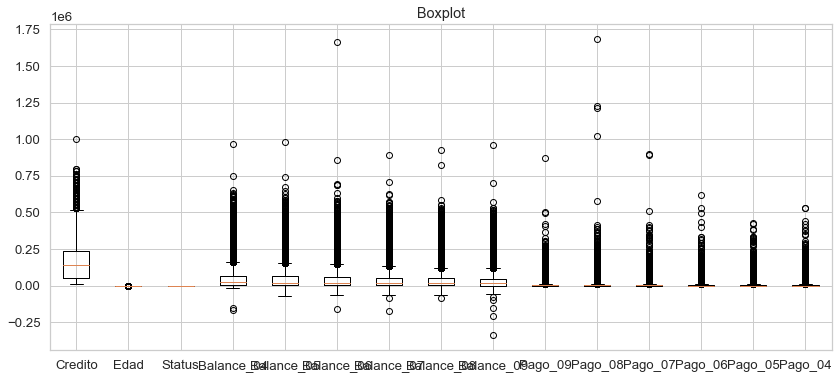

In [78]:

plt.figure(figsize=(14,6))
plt.boxplot(dfCopia[cont],labels=cont)
plt.title("Boxplot")
plt.show()

Este gráfico es de mucha ayuda para visual valores mínimos, max, desviación, media y outliers de manera rápida. 

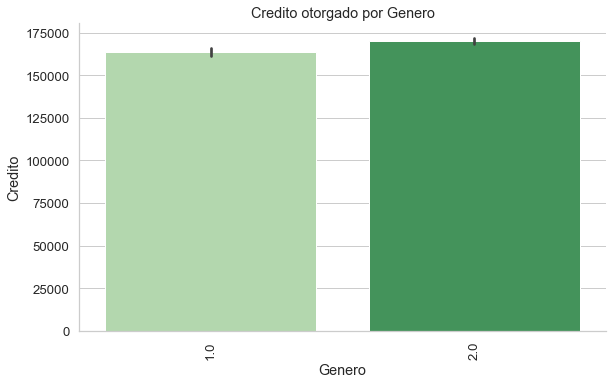

In [84]:
sns.catplot(data=dfCopia, y="Credito",x="Genero", kind="bar",aspect=1.7 , palette="Greens")
plt.xticks(rotation=90)
plt.title("Credito otorgado por Genero")
plt.show()

con el Catplot, podemos ver la distribución de créditos otorgados para los 2 géneros.